*Doc started 2022-03-13*

*Current version: 2022-03-13*

*Last running version: 2022-03-20*

In [1]:
source_data = "../../example_data/colfiorito_2007/srtm2.tif"

In [2]:
from pygsf.io.rasters.gdal import try_read_raster_band
success, result = try_read_raster_band(raster_source=source_data)

In [3]:
print(success)

True


In [4]:
geotransform, projection, band_params, data = result

In [5]:
for info in (geotransform, projection, band_params, data):
    print(f"info type: {type(info)}:\n\n{info}\n\n")

info type: <class 'pygsf.geometries.space2d.grids.geotransform.GeoTransform'>:

[ 3.06121846e+05  8.02576886e+01  0.00000000e+00  4.78226131e+06
  0.00000000e+00 -8.02576886e+01]


info type: <class 'str'>:

PROJCS["WGS 84 / UTM zone 33N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32633"]]


info type: <class 'dict'>:

{'dataType': 'Int16', 'unitType': '', 'stats': {'min': 183.0, 'max': 1570.0, 'mean': 714.76141336527, 'std_dev': 294.45128151837}, 'noData': -32768.0, 'numOverviews

In [6]:
from pygsf.georeferenced.space2d.rasters.geoarrays import *
geoarray = GeoArray(
    geotransform=geotransform,
    epsg_code=32633,
    arrays=[data]
)

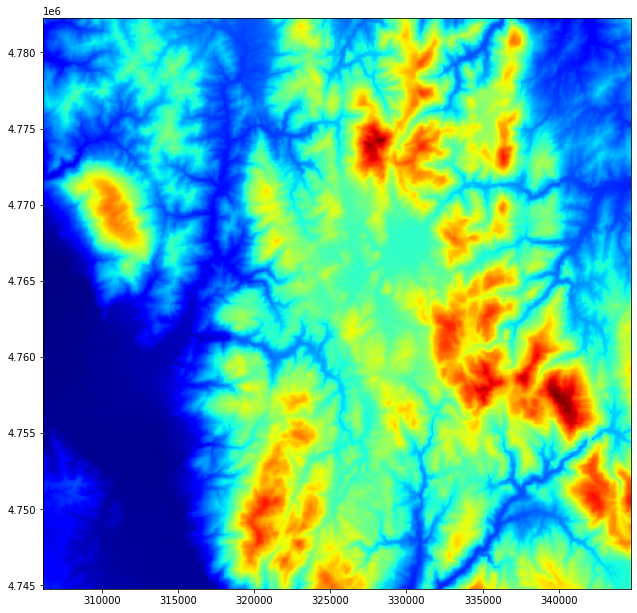

In [7]:
from pygsf.plots.rasters import plot_grid
fig = plot_grid(geoarray)

# Profile

In [8]:
from pygsf.io.vectors.gdal import try_read_line_shp_with_attr

src_profile_shapefile_pth = "../../example_data/colfiorito_2007/single_profile_swne.shp"
success, result = try_read_line_shp_with_attr(src_profile_shapefile_pth)

In [9]:
print(success)

True


In [10]:
print(result)

[([GeoLine2D with 2 points: (317056.4045, 4757983.4378) ... (336834.7662, 4771840.8887) with EPSG code 32633], ())]


In [11]:
[geoline], _ = result[0]

In [12]:
print(geoline.shape)

Line2D with 2 points: (317056.4045, 4757983.4378) ... (336834.7662, 4771840.8887)


In [13]:
print(geoline.epsg_code)

32633


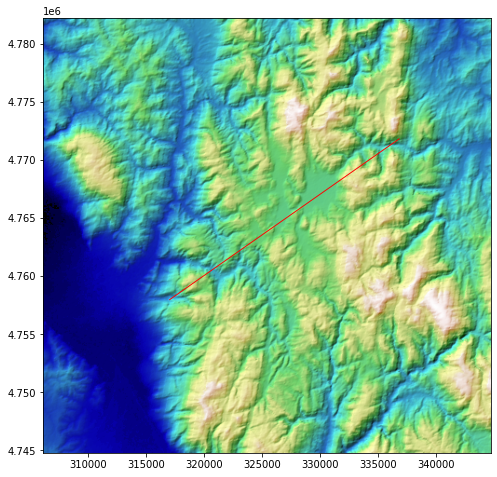

In [14]:
from pygsf.plots.maps import plot_map

line = geoline.shape

plot_map(        
    geoarray=geoarray,
    grid_level=0,
    grid_colormap="gist_earth",
    lines=[line],
    linecolor="red",
    linestyle='-',
    linewidth=0.95,
    linelabels=True,
    figure_width=12,
    figure_height=8,
    hillshade=True,
    hs_vert_exagg= 1.0,
    hs_blend_mode= 'overlay', # one of 'hillshade', 'hsv', 'overlay', 'soft'
    hs_light_source_azim = 315.0,
    hs_light_source_degr = 45.0,
    plot_colorbar = False,
)

### Initializing a line profiler

In [15]:
from pygsf.profiles.profilers import LineProfiler

In [16]:
line_profiler = LineProfiler(
    src_line=line,
    epsg_code=32633)

In [17]:
topographic_profile, err = line_profiler.profile_grid(
    geoarray=geoarray,
    sampling_distance=20 # meters
)

assert not err

In [18]:
print(type(topographic_profile))

<class 'pygsf.geometries.space2d.general.XYArrayPair'>


In [19]:
topographic_profile.x_breaks()

array([    0.       , 24149.7937014])

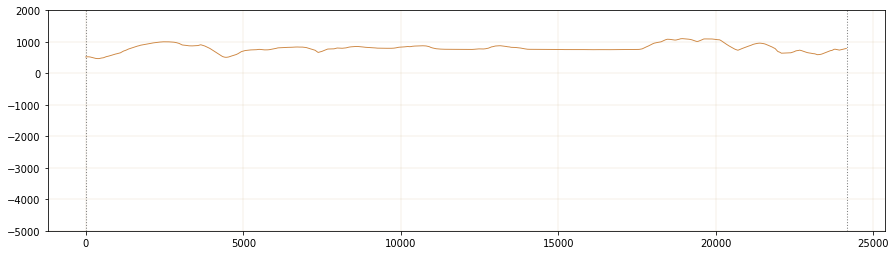

In [20]:
from pygsf.plots.profiles_matplotlib import *

fig = plot(
    topographic_profile, 
    color='peru', 
    aspect=1, 
    linewidth=0.9, 
    z_min=-5000, 
    z_max=2000, 
    grid=True, 
    breaklines=True,
    breaklines_color='grey',
    breaklines_width=1.05
)

### Initializing a geoprofile

In [21]:
from pygsf.profiles.geoprofiles import GeoProfile

geoprofile = GeoProfile(
    topoprofile=topographic_profile)

### Plotting geological beach balls

In [22]:
seisms_shape = "/home/mauro/Documents/projects/gsf/example_data/colfiorito_2007/ipocentri3d_shcm_wu3.shp"

In [23]:
import geopandas

seisms = geopandas.read_file(seisms_shape)

seisms

OBJECTID  DEPTH  YEAR  MONTH  DAY  HOUR  MINUTE  MAGNITUDE  STRIKE  DIP  \
0           1  6.270  1997      9    3    22       7        4.4     137   30   
1           2  5.700  1997      9   26     0      33        5.6     152   46   
2           3  5.700  1997      9   26     9      40        5.8     144   42   
3           5  3.900  1997      9   26    13      30        4.3     147   29   
4          49  5.700  1997      9   27     8       8        4.3     148   55   
..        ...    ...   ...    ...  ...   ...     ...        ...     ...  ...   
325      1484  1.630  1997     10   27    14      34        2.4     160   65   
326      1487  1.136  1997     10   27    16      44        2.4      95   55   
327      1489  1.787  1997     10   27    19      27        2.9     330   75   
328      1495  4.712  1997     10   28     7      42        3.1     120   45   
329      1497  2.453  1997     10   28    12      35        2.4     130   55   

     RAKE        DATA     DATAEND  EPICENTER_  DEPTH_M  DEPTH_CORR       X  \
0     -88  1997-09-03  1997-09-04       804.0    -6270       -5466  327572   
1     -83  1997-09-26  1997-09-27       830.0    -5700       -4870  328216   
2     -80  1997-09-26  1997-09-27       838.0    -5700       -4862  325835   
3     -88  1997-09-26  1997-09-27       841.0    -3900       -3059  332530   
4     -89  1997-09-27  1997-09-28       641.0    -5700       -5059  322920   
..    ...         ...         ...         ...      ...         ...     ...   
325   -60  1997-10-27  1997-10-28       805.0    -1630        -825  324353   
326  -120  1997-10-27  1997-10-28       972.0    -1136        -164  326337   
327  -140  1997-10-27  1997-10-28      1051.0    -1787        -736  331932   
328   -90  1997-10-28  1997-10-29       804.0    -4712       -3908  330369   
329  -100  1997-10-28  1997-10-29       760.0    -2453       -1693  326579   

           Y     Z                                    geometry  
0    4765486 -5466  POINT Z (327572.206 4765486.491 -5466.000)  
1    4765470 -4870  POINT Z (328215.918 4765470.292 -4870.000)  
2    4766420 -4862  POINT Z (325834.812 4766419.524 -4862.000)  
3    4765174 -3059  POINT Z (332529.863 4765174.395 -3059.000)  
4    4773184 -5059  POINT Z (322920.439 4773184.390 -5059.000)  
..       ...   ...                                         ...  
325  4764616  -825   POINT Z (324353.156 4764615.822 -825.000)  
326  4762840  -164   POINT Z (326337.146 4762840.171 -164.000)  
327  4763607  -736   POINT Z (331931.728 4763607.485 -736.000)  
328  4758433 -3908  POINT Z (330368.680 4758432.793 -3908.000)  
329  4764563 -1693  POINT Z (326579.350 4764563.139 -1693.000)  

[330 rows x 20 columns]

In [24]:
seisms.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 12°E to 18°E - by country
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

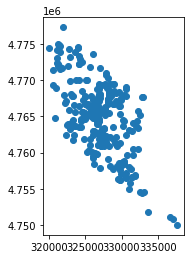

In [25]:
seisms_ax = seisms.plot()

In [26]:
from pprint import pprint
from pygsf.io.vectors.geopandas import extract_faults

faults, err = extract_faults(
    geodataframe = seisms, 
    azim_fldnm = "STRIKE", 
    dip_ang_fldnm = "DIP",
    rake_fldnm = "RAKE",
    is_rhrstrike = True
)
if err is None:
    pprint(faults)      
else:    
    print(err)  

[(1,
  Point3D(327572.2063, 4765486.4908, -5466.0000),
  Fault(227.0, 30.0) with Slickenline(rake: -88.00)),
 (2,
  Point3D(328215.9182, 4765470.2922, -4870.0000),
  Fault(242.0, 46.0) with Slickenline(rake: -83.00)),
 (3,
  Point3D(325834.8122, 4766419.5244, -4862.0000),
  Fault(234.0, 42.0) with Slickenline(rake: -80.00)),
 (4,
  Point3D(332529.8628, 4765174.3946, -3059.0000),
  Fault(237.0, 29.0) with Slickenline(rake: -88.00)),
 (5,
  Point3D(322920.4392, 4773184.3896, -5059.0000),
  Fault(238.0, 55.0) with Slickenline(rake: -89.00)),
 (6,
  Point3D(329274.2186, 4767066.7488, -2661.0000),
  Fault(195.0, 45.0) with Slickenline(rake: -110.00)),
 (7,
  Point3D(322571.7105, 4763904.4491, -6263.0000),
  Fault(220.0, 55.0) with Slickenline(rake: -80.00)),
 (8,
  Point3D(326994.7728, 4767474.1042, -2332.0000),
  Fault(180.0, 25.0) with Slickenline(rake: 120.00)),
 (9,
  Point3D(328486.3820, 4767823.5579, -3412.0000),
  Fault(220.0, 75.0) with Slickenline(rake: -80.00)),
 (10,
  Point3D(32

In [27]:
points = [record[:2] for record in faults]

In [28]:
print(points)

[(1, Point3D(327572.2063, 4765486.4908, -5466.0000)), (2, Point3D(328215.9182, 4765470.2922, -4870.0000)), (3, Point3D(325834.8122, 4766419.5244, -4862.0000)), (4, Point3D(332529.8628, 4765174.3946, -3059.0000)), (5, Point3D(322920.4392, 4773184.3896, -5059.0000)), (6, Point3D(329274.2186, 4767066.7488, -2661.0000)), (7, Point3D(322571.7105, 4763904.4491, -6263.0000)), (8, Point3D(326994.7728, 4767474.1042, -2332.0000)), (9, Point3D(328486.3820, 4767823.5579, -3412.0000)), (10, Point3D(326863.1574, 4767475.1033, -1876.0000)), (11, Point3D(326838.7438, 4768724.6650, -2079.0000)), (12, Point3D(326882.1651, 4767466.0651, -1863.0000)), (13, Point3D(324913.0893, 4767848.6043, -3470.0000)), (14, Point3D(326715.7045, 4766282.0162, -1853.0000)), (15, Point3D(326456.3626, 4767107.0358, -3419.0000)), (16, Point3D(328315.5051, 4768587.4959, -1733.0000)), (17, Point3D(329270.4258, 4768184.1915, -2078.0000)), (18, Point3D(330647.3209, 4768839.8894, -924.0000)), (19, Point3D(324916.3514, 4765222.251

In [29]:
mapping_method = {'method': 'nearest'}
result, err = line_profiler.project_points_to_section(
        points_3d=points,
        mapping_method=mapping_method,
        max_profile_distance=1000
    ) # -> Tuple[Union[type(None), Dict[RecId, List[PointTrace]]], Error]

In [30]:
print(err)

In [31]:
print(result)

defaultdict(<class 'pygsf.profiles.profiletraces.PlaneTrace'>, {1: PointTrace(s=12917.65, z=-5466.00, dist=110.80), 2: PointTrace(s=13435.54, z=-4870.00, dist=271.83), 6: PointTrace(s=15218.34, z=-2661.00, dist=428.38), 24: PointTrace(s=15216.06, z=-2243.00, dist=330.16), 36: PointTrace(s=15825.74, z=-1643.00, dist=247.33), 41: PointTrace(s=15241.96, z=-2764.00, dist=410.60), 52: PointTrace(s=14799.91, z=-3308.00, dist=303.09), 53: PointTrace(s=10303.74, z=-4117.00, dist=910.05), 58: PointTrace(s=15974.97, z=-6164.00, dist=437.76), 67: PointTrace(s=9236.34, z=-1019.00, dist=374.25), 93: PointTrace(s=12233.17, z=-2124.00, dist=788.89), 103: PointTrace(s=14637.40, z=-3589.00, dist=422.56), 109: PointTrace(s=16809.31, z=-1056.00, dist=266.81), 120: PointTrace(s=11658.53, z=-1732.00, dist=428.31), 123: PointTrace(s=12596.55, z=-1604.00, dist=949.65), 128: PointTrace(s=12334.37, z=-1589.00, dist=465.59), 129: PointTrace(s=9657.57, z=-640.00, dist=991.51), 133: PointTrace(s=11804.32, z=-2909

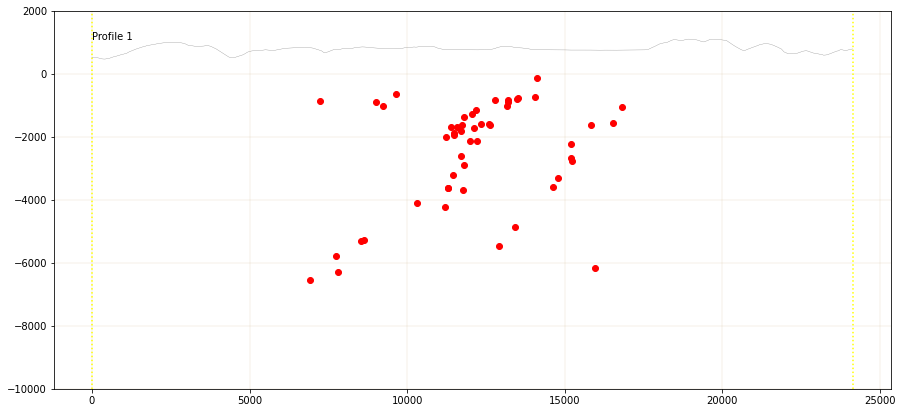

In [35]:
geoprofile.points_projections = result
fig = plot(
    geoprofile,
    aspect=1, 
    linewidth=0.3, 
    width=15,
    height=7,
    z_min=-10000, 
    z_max=2000, 
    grid=True, 
)